In [20]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as stm

In [21]:
df = pandas.read_csv('dataset.csv')

print(df.describe(), "\n")

       valor_aluguel      area_m2  ano_construcao  codigo_localidade  \
count    1536.000000  1536.000000     1536.000000        1536.000000   
mean      465.932827    68.722005     1955.890625           1.439453   
std       195.558568    23.678084       22.424737           0.548833   
min        40.512820    20.000000     1918.000000           1.000000   
25%       333.166675    54.000000     1939.000000           1.000000   
50%       437.461515    67.000000     1959.000000           1.000000   
75%       568.500013    82.000000     1972.000000           2.000000   
max      1517.948700   160.000000     1997.000000           3.000000   

       numero_banheiros  numero_cozinhas  codigo_bairro  
count       1536.000000      1536.000000    1536.000000  
mean           0.074219         0.046224    1206.304688  
std            0.262212         0.210038     692.530502  
min            0.000000         0.000000     113.000000  
25%            0.000000         0.000000     611.000000  
50%

In [22]:
print(df.head())

   valor_aluguel  area_m2  ano_construcao  codigo_localidade  \
0      120.97436       35            1939                  1   
1      436.97433      104            1939                  1   
2      355.74360       29            1971                  2   
3      282.92310       39            1972                  2   
4      807.23080       97            1985                  1   

   numero_banheiros  numero_cozinhas  codigo_bairro  
0                 0                0           1112  
1                 1                0           1112  
2                 0                0           2114  
3                 0                0           2148  
4                 0                0           2222  


<Axes: xlabel='valor_aluguel', ylabel='Count'>

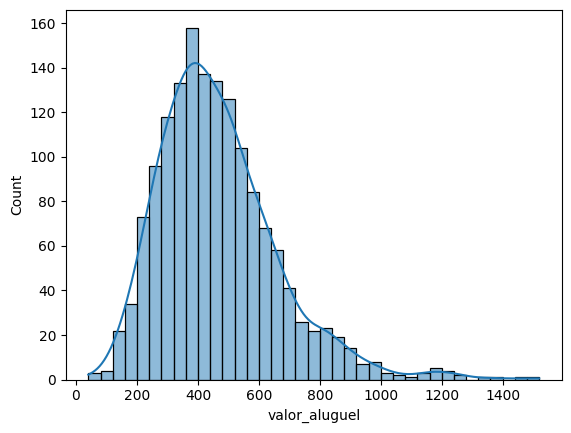

In [23]:
seaborn.histplot(data = df, x="valor_aluguel", kde=True)#kde é a linha

In [24]:
print(df.corr(), "\n")#Cria uma tabela de correlação das variaveis

                   valor_aluguel   area_m2  ano_construcao  codigo_localidade  \
valor_aluguel           1.000000  0.587812        0.140571           0.181594   
area_m2                 0.587812  1.000000       -0.204832           0.124357   
ano_construcao          0.140571 -0.204832        1.000000          -0.165212   
codigo_localidade       0.181594  0.124357       -0.165212           1.000000   
numero_banheiros        0.288268  0.261764        0.058218           0.022192   
numero_cozinhas         0.156194  0.028129        0.103288          -0.023742   
codigo_bairro          -0.047904 -0.134515        0.339473          -0.265878   

                   numero_banheiros  numero_cozinhas  codigo_bairro  
valor_aluguel              0.288268         0.156194      -0.047904  
area_m2                    0.261764         0.028129      -0.134515  
ano_construcao             0.058218         0.103288       0.339473  
codigo_localidade          0.022192        -0.023742      -0.265878  
n

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

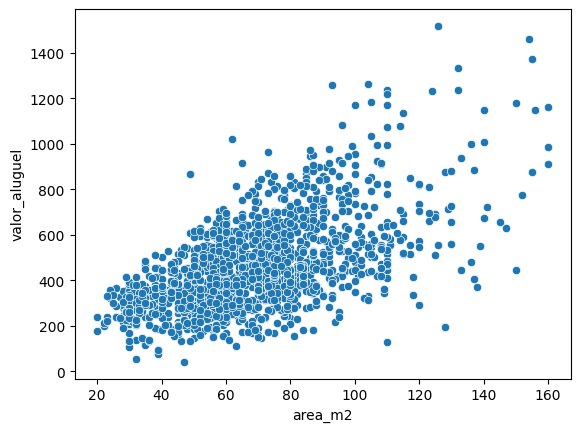

In [25]:
seaborn.scatterplot(data = df, x = 'area_m2', y='valor_aluguel')
#X é a variavel de explicação Pode ser usada mais de uma variavel de explicação, normalmente é com maior correlação com a variavel alvo
#Y é a variavel alvo

Aqui entra o statsmodels

In [40]:
#Vai formalizar as variaveis alvo e explicativas
y = df['valor_aluguel'] #Variavel alvo
x = df['area_m2'] #Variavel explicativa

#Esta adicionando uma constante a variavel x, é requerido pelo statsmodels
x = stm.add_constant(x)

In [41]:
modelo = stm.OLS(y, x) #Neste caso o y realmente vem antes do x
        #OLS é o modelo de criação de regressao linear

#Treinamento do modelo
resultado = modelo.fit()#Aqui ele vai aprender os coeficientes da equação

print(resultado.summary()) #Mostra várias estatisticas no resultado

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     809.9
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          2.14e-143
Time:                        17:43:05   Log-Likelihood:                -9957.1
No. Observations:                1536   AIC:                         1.992e+04
Df Residuals:                    1534   BIC:                         1.993e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.3033     12.400     10.670      0.0

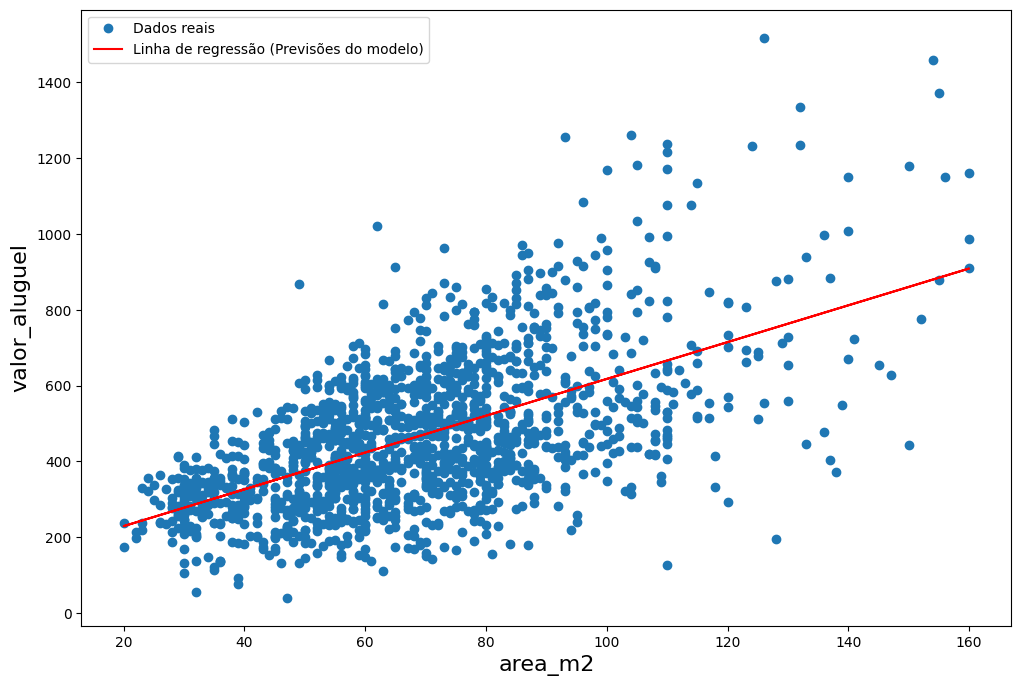

In [42]:
#Criar um gráfico com estes dados
plt.figure(figsize=(12, 8))
plt.xlabel('area_m2', size=16)
plt.ylabel('valor_aluguel', size=16)
plt.plot(x['area_m2'], y, 'o', label='Dados reais')#Este é o "Scatter Plot"
plt.plot(x['area_m2'], resultado.fittedvalues, 'r-', label='Linha de regressão (Previsões do modelo)')#Esta é a linha com as previsões do modelo
plt.legend(loc='best')                                                                                  #São os coeficientes + x